In [11]:
from FirstModelOOP import FirstModel
from brian2 import*
from functions import*


%load_ext autoreload
%autoreload 2

start_scope()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
params = {
    "rows" : 20,
    "cols" : 25
}

fm1 = FirstModel(params)

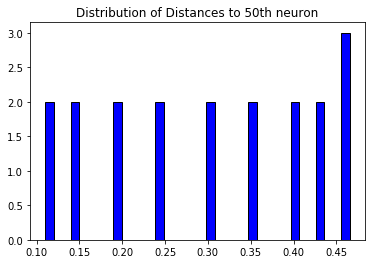

In [13]:
neuron_idx = 50
fm1.plot_neuron_distances(50)

## Comment 
Here cheks the neurons are well created, and connected by the synapses.

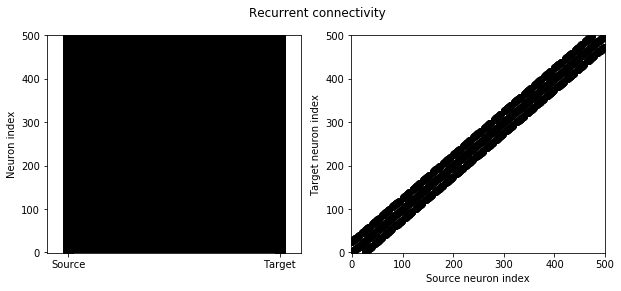

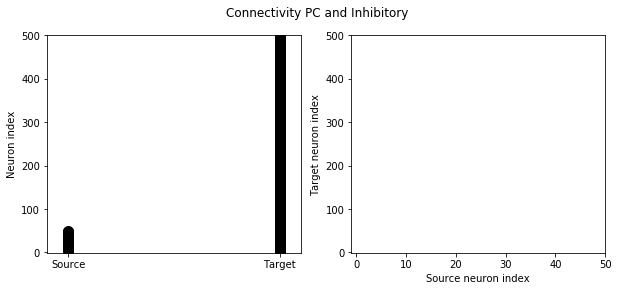

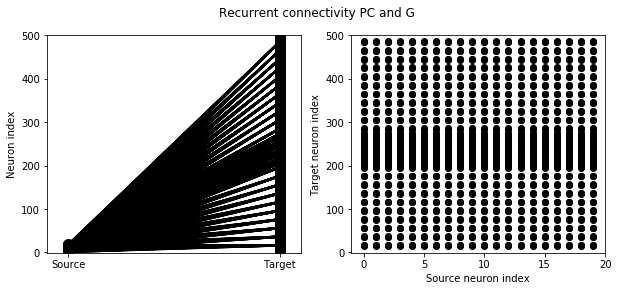

In [66]:
functions.visualise_connectivity(fm1.SPC, "Recurrent connectivity")
functions.visualise_connectivity(fm1.SPCINH, "Connectivity PC and Inhibitory")
functions.visualise_connectivity(fm1.SPCG, "Recurrent connectivity PC and G")


In [14]:
#New neuron group. Made for testing what is collected for the run.

ie = 60
ei = -80
vth_i = -50
tr_i = 2 * ms
gi = 1

eqs_ext_inp = '''
dw/dt = (I-(w-ei) + ie)/tau : 1
tau : second
I : 1
'''

N = NeuronGroup(1, eqs_ext_inp, threshold='w>vth_i', reset='w = ei', refractory=tr_i, method='euler')
N.I = - 10
N.tau = 5 * ms

MN = StateMonitor(N, 'w', record = True)

### Comment
See that the printed "collect" only shows "set()". Thus it does not use any of the variable of the created class fm1 for the brian2.run(duration) inside the function model.run() , thus does not record the State Monitor.

The function *collect()*:
https://brian2.readthedocs.io/en/stable/reference/brian2.core.magic.collect.html?highlight=collect

get objects in namespace
set()
self PC  NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_5')
self INH  NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_6')
self G  NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_7')
self S  NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_8')
self MPC  <StateMonitor, recording ['v'] from neurongroup_5>
self MM  <StateMonitor, recording ['v'] from neurongroup_5>
self MPC  <StateMonitor, recording ['v'] from neurongroup_5>
self MG  <StateMonitor, recording ['v'] from neurongroup_7>
self MINH  <StateMonitor, recording ['v'] from neurongroup_6>
collect 
set()


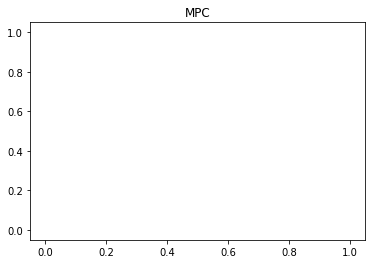

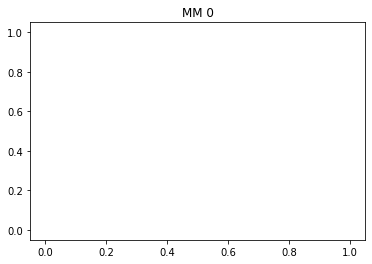

In [15]:
fm1.run()

## Comment
Here checks, if we run outside the class: what variables does it use for the run?
Shows it only uses the variables outside of the class.

In [16]:
collect()
#core.magic.get_objects_in_namespace(0)

{<StateMonitor, recording ['w'] from neurongroup_9>,
 NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='neurongroup_9')}

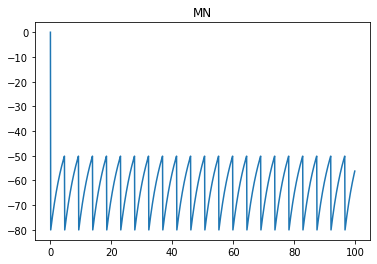

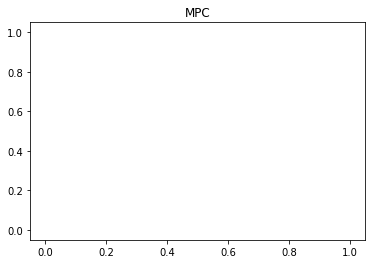

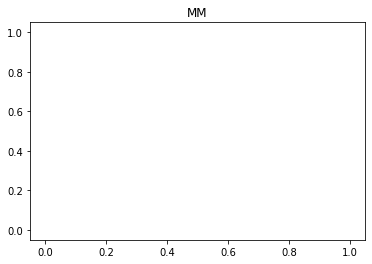

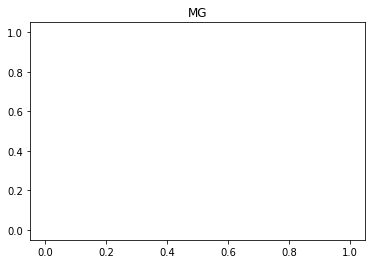

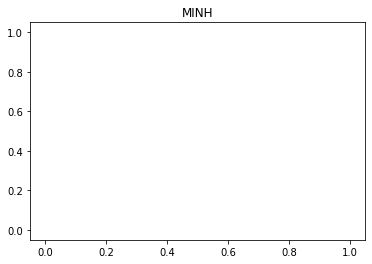

In [17]:
#MPC = StateMonitor(M, 'v', record=some_indices(50))

run(100*ms)
#plot(MN.t /ms, MN.v[0])
#title('Test recording')
#show()

plot(MN.t / ms, MN.w[0], label="0")
title("MN")
show()


plot(fm1.MPC.t / ms, fm1.MPC.v[0], label="0")
title("MPC")
show()

plot(fm1.MM.t / ms, fm1.MM.v[0], label="0")
title("MM")
show()

plot(fm1.MG.t / ms, fm1.MG.v[0], label="0")
title("MG")
show()

plot(fm1.MINH.t / ms, fm1.MINH.v[0], label="0")
title("MINH")
show()



In [49]:
if False:
    plot_distance(PC,neuron_idx, rows, cols)

first_spiking, last_spiking = functions.plot_spike_times(fm1)

aaaaaaa [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

ValueError: zero-size array to reduction operation minimum which has no identity

NameError: name 'MPC' is not defined

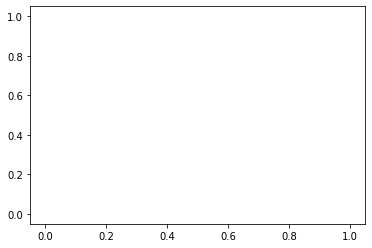

In [50]:
linePC0, =  plot(fm1.MPC.t / ms, fm1.MPC.v[0], label='PC' + str(fm1.neuron_idx))
linePC1, = plot(MPC.t / ms, MPC.v[1], label='PC' + str(my_indicies[1]))

linePC3, = plot(MPC.t / ms, MPC.v[3], label='PC' + str(my_indicies[3]))
linePC4, = plot(MPC.t / ms, MM.v[first_spiking], label='first')

linePC4, = plot(MPC.t / ms, MM.v[last_spiking], label='last')

savefig('Voltage of Pyramidal cells.png')
legend()
title("Voltage of Pyramidal cells")
show()

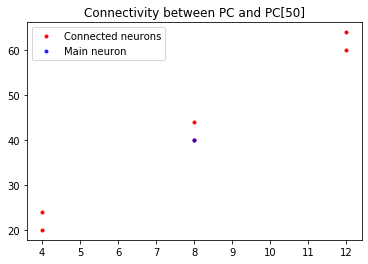

In [54]:
#plot_distance(PC, 0, rows, cols)

plot_connectivity(fm1.PC, fm1.SPC, fm1.p["rows"], fm1.p["cols"], "PC[" +str(50)+ "]" , 50)
show()

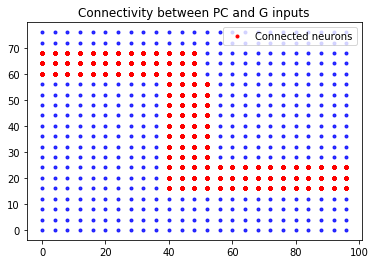

In [55]:
plot_connectivity(fm1.PC, fm1.SPCG, fm1.p["rows"], fm1.p["cols"], "G inputs")
savefig('PC_Gconnectivity.png')
show()

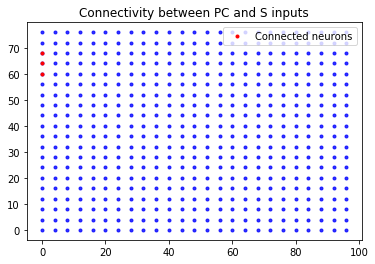

In [56]:
plot_connectivity(fm1.PC, fm1.SS, fm1.p["rows"], fm1.p["cols"], "S inputs")
savefig('PC_Sconnectivity.png')
show()

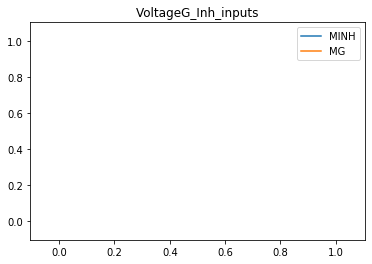

In [57]:
#Inhibitory
lineINH, = plot(fm1.MINH.t / ms, fm1.MINH.v[0], label='MINH')

lineG, = plot(fm1.MG.t / ms, fm1.MG.v[0], label='MG')
legend()
title("VoltageG_Inh_inputs")

savefig('VoltageG_Inhcells.png')
show()

In [12]:
x = 1

if x != 0:
    raise ValueError("Expected zero number of links, got", x)

ValueError: ('Expected zero number of links, got', 1)